### Récupération du dataset

In [1]:
from sklearn import datasets
import pandas as pd

digits = datasets.load_digits()

X_digits = pd.DataFrame(digits.data)
y_digits = digits.target

display(X_digits)



,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


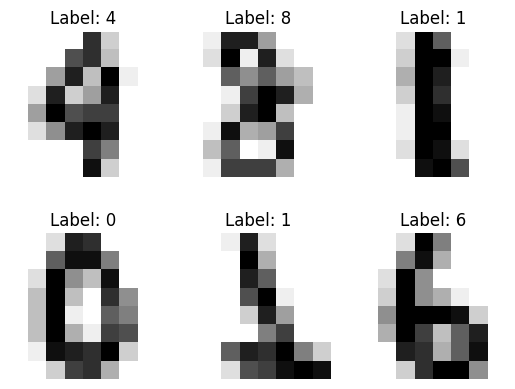

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm # pour importer de nouvelles cartes de couleur
import numpy as np

j=0

for i in np.random.choice(np.arange(0, len(y_digits)), size=6):
    j=j+1
#On stocke l'indice dans la liste i pour pouvoir afficher le label correspondant plus tard.
    
    plt.subplot(2,3,j)
# Rajouter *plt.subplot(2,3,j)* à chaque itération permet d'afficher toutes les images
# ensembles sur la même figure.

    plt.axis('off')
# Permet de supprimer les axes (ici sert à mieux voir les titres)
    
    plt.imshow(digits.images[i],cmap = cm.binary, interpolation='None')
# Affiche l'image n°i
# L'utilisation de cm.binary permet de voir les chiffres en gris sur fond blanc.

    plt.title('Label: %i' %y_digits[i])
# Pour chaque image on écrit en titre le label qui lui correspond. 


### Entraînement du modèle KNN

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.2, random_state=123)

from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

### Evaluation du modèle

In [5]:
y_pred = knn.predict(X_test)

# Afficher la matrice de confusion
display(pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite']))

# Afficher l'accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Afficher le rapport de classification
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print(class_report)

Classe prédite,0,1,2,3,4,5,6,7,8,9
Classe réelle,,,,,,,,,,
0,39,0,0,0,0,0,0,0,0,0
1,0,34,0,0,0,0,0,0,0,0
2,0,0,36,0,0,0,0,0,0,0
3,0,0,0,33,0,0,0,0,0,0
4,0,0,0,0,41,0,0,1,0,0
5,0,0,0,0,0,36,0,0,0,1
6,0,0,0,0,0,0,43,0,0,0
7,0,0,0,0,0,0,0,31,0,0
8,0,3,1,0,0,0,0,0,33,0


0.9833333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.92      1.00      0.96        34
           2       0.97      1.00      0.99        36
           3       1.00      1.00      1.00        33
           4       1.00      0.98      0.99        42
           5       1.00      0.97      0.99        37
           6       1.00      1.00      1.00        43
           7       0.97      1.00      0.98        31
           8       1.00      0.89      0.94        37
           9       0.97      1.00      0.98        28

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



### Bonus : scores des modèles knn suivant différentes métriques


In [6]:
score_minko= []
score_man = []
score_cheb = []

def score_knn (k,distance):
    knn_model = neighbors.KNeighborsClassifier(k,metric=distance)
    knn_model.fit(X_train,y_train)
    return knn_model.score(X_test,y_test)

for k in range(1,41):
    score_minko.append(score_knn(k,'minkowski'))
    score_man.append(score_knn(k,'manhattan'))
    score_cheb.append(score_knn(k,'chebyshev'))

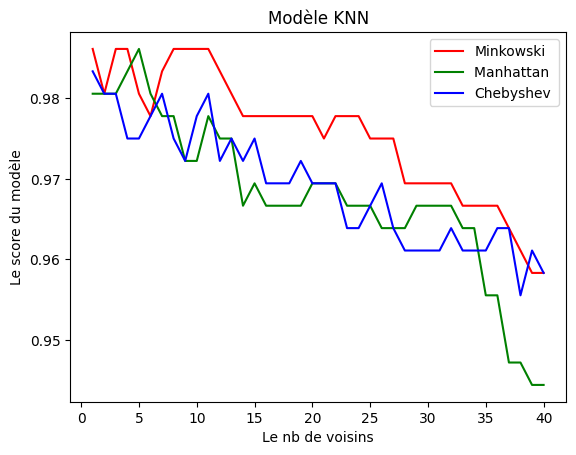

In [7]:
plt.plot(np.arange(1,41),score_minko,color="red",label="Minkowski")
plt.plot(np.arange(1,41),score_man,color="green",label="Manhattan ")
plt.plot(np.arange(1,41),score_cheb,color="blue",label="Chebyshev")
plt.xlabel("Le nb de voisins")
plt.ylabel("Le score du modèle")
plt.title("Modèle KNN")
plt.legend()
plt.show()